In [2]:
pip install praw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 1.5 MB/s eta 0:00:00


In [59]:
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import praw
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from datetime import datetime, timedelta

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [60]:
reddit=praw.Reddit(
    client_id="",
    client_secret="",
    user_agent=""
)

In [67]:
ids,headlines,authors,created_utcs,upvotes,upvotesPercentage,urls,numcomments=[],[],[],[],[],[],[],[]

for subred in reddit.subreddit('Palestine').hot(limit=None):
  ids.append(subred.id)
  headlines.append(subred.title)
  authors.append(subred.author)
  times = subred.created_utc
  datetimes = datetime.utcfromtimestamp(times)
  created_utcs.append(datetimes.strftime('%Y-%m-%d'))
  upvotes.append(subred.score)
  upvotesPercentage.append(subred.upvote_ratio)
  urls.append(subred.url)
  numcomments.append(subred.num_comments)
data={
    'ID':ids,
    'Titre':headlines,
    'Auteur':authors,
    'Temps de création':created_utcs,
    'Up votes':upvotes,
    'Poucentage des up votes':upvotesPercentage,
    'Nombre de commentaire':numcomments
}
df=pd.DataFrame(data)
df

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

,ID,Titre,Auteur,Temps de création,Up votes,Poucentage des up votes,Nombre de commentaire
0,18ext8v,🇵🇸 📢 Megathread and Discord Alert! 📢🇵🇸 - Dec 10th,sabbah,2023-12-10,59,0.93,72
1,193xr0l,South Africa presents its case against Israel ...,sabbah,2024-01-11,646,0.99,77
2,19417cz,Israelis are having a totally normal reaction ...,hunegypt,2024-01-11,912,0.93,156
3,1944i4o,South African Lawyers at the International Cou...,dankmemegawd,2024-01-11,462,0.99,26
4,193zagt,Israelis reacting to this hearing so cartoonis...,hunegypt,2024-01-11,612,0.98,52
...,...,...,...,...,...,...,...
639,18va8wq,Israel’s relentless bombardment destroyed over...,Lilyo,2023-12-31,46,0.89,2
640,18vf0cj,2024 Ceasefire now. Please,Zestyclose-Pride6459,2023-12-31,22,0.92,1
641,18usvft,Israelis write the names of the Hadid family o...,rexaby,2023-12-30,714,0.97,40
642,18v5w2k,🇵🇸 - A picture of a poster made in 1898 by the...,hunegypt,2023-12-31,77,0.92,1


In [70]:
df.to_csv('Palestine.csv',encoding='utf-8')

In [29]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [33]:
sia = SIA()
results=[]
for line,date in zip(df['Titre'],df['Temps de création']):
  pol_score['Date'] = date
  pol_score['Titre'] = line
  pol_score=sia.polarity_scores(line)
  results.append(pol_score)
df_score=pd.DataFrame.from_records(results)
df_score


,neg,neu,pos,compound,Date,Titre
0,0.267,0.536,0.197,-0.2003,2024-01-11,South Africa presents its case against Israel ...
1,0.000,1.000,0.000,0.0000,2024-01-11,Israelis are having a totally normal reaction ...
2,0.066,0.891,0.043,-0.2023,2024-01-11,South African Lawyers at the International Cou...
3,0.000,0.764,0.236,0.5267,2024-01-11,Israelis reacting to this hearing so cartoonis...
4,0.194,0.806,0.000,-0.7893,2024-01-11,Disney's new superhero Sabra
...,...,...,...,...,...,...
640,0.064,0.816,0.120,0.2960,2023-12-31,Action for Palestine in Madrid
641,0.000,1.000,0.000,0.0000,2023-12-31,GPT4 knows right from wrong when it comes to p...
642,0.103,0.897,0.000,-0.4767,2023-12-31,Not Just Numbers - Animatic
643,0.000,1.000,0.000,0.0000,2023-12-31,"Israeli politician, Moshe Feiglin attacks Neta..."


In [38]:
df_score['Score']=0
df_score.loc[df_score['compound']<-0.2,'Score']=-1
df_score.loc[df_score['compound']>0.2,'Score']=1
df_score

,neg,neu,pos,compound,Date,Titre,score,Score
0,0.267,0.536,0.197,-0.2003,2024-01-11,South Africa presents its case against Israel ...,-1,-1
1,0.000,1.000,0.000,0.0000,2024-01-11,Israelis are having a totally normal reaction ...,0,0
2,0.066,0.891,0.043,-0.2023,2024-01-11,South African Lawyers at the International Cou...,-1,-1
3,0.000,0.764,0.236,0.5267,2024-01-11,Israelis reacting to this hearing so cartoonis...,1,1
4,0.194,0.806,0.000,-0.7893,2024-01-11,Disney's new superhero Sabra,-1,-1
...,...,...,...,...,...,...,...,...
640,0.064,0.816,0.120,0.2960,2023-12-31,Action for Palestine in Madrid,1,1
641,0.000,1.000,0.000,0.0000,2023-12-31,GPT4 knows right from wrong when it comes to p...,0,0
642,0.103,0.897,0.000,-0.4767,2023-12-31,Not Just Numbers - Animatic,-1,-1
643,0.000,1.000,0.000,0.0000,2023-12-31,"Israeli politician, Moshe Feiglin attacks Neta...",0,0


In [39]:
df_score=df_score[['Date','Titre','Score']]
df_score

,Date,Titre,Score
0,2024-01-11,South Africa presents its case against Israel ...,-1
1,2024-01-11,Israelis are having a totally normal reaction ...,0
2,2024-01-11,South African Lawyers at the International Cou...,-1
3,2024-01-11,Israelis reacting to this hearing so cartoonis...,1
4,2024-01-11,Disney's new superhero Sabra,-1
...,...,...,...
640,2023-12-31,Action for Palestine in Madrid,1
641,2023-12-31,GPT4 knows right from wrong when it comes to p...,0
642,2023-12-31,Not Just Numbers - Animatic,-1
643,2023-12-31,"Israeli politician, Moshe Feiglin attacks Neta...",0


In [40]:
df_score.to_csv('headlines_score.csv',encoding='utf-8',index=False)

In [42]:
df_score.Score.value_counts()

 0    275
-1    237
 1    133
Name: Score, dtype: int64

In [43]:
df_score.Score.value_counts(normalize=True)*100

 0    42.635659
-1    36.744186
 1    20.620155
Name: Score, dtype: float64

In [45]:
print("Quelque positive headlines:")
pprint(list(df_score[df_score['Score']==1].Titre)[:5],width=200)

print("____________________________________________________________________________________________________________")

print("Quelque neutre headlines:")
pprint(list(df_score[df_score['Score']==0].Titre)[:5],width=200)

print("____________________________________________________________________________________________________________")

print("Quelque negative headlines:")
pprint(list(df_score[df_score['Score']==-1].Titre)[:5],width=200)

Quelque positive headlines:
["Israelis reacting to this hearing so cartoonishly racist, it's peak colonizer attitude. This is a journalist working for the Jewish Insider retweeting a post about mocking South Africa for not "
 'having “clean water”.',
 'Eurovision: Finnish artists want Israel barred from contest over Gaza war',
 'this ad i just got',
 'ICJ judges in South Africa vs Israel',
 'Say it louder']
____________________________________________________________________________________________________________
Quelque neutre headlines:
['Israelis are having a totally normal reaction to the case presented by South Africa. If their defense to justify their actions will be to look what the other side did than they already lost.',
 'Comrade Corbyn showing solidarity for the Palestinians at the Hague',
 'Opening Statement of South Africa in ICJ',
 "This Palestinian grandmother was waving a white flag in a Gaza 'safe corridor'. An Israeli sniper shot her dead",
 'Everyone except John Kir

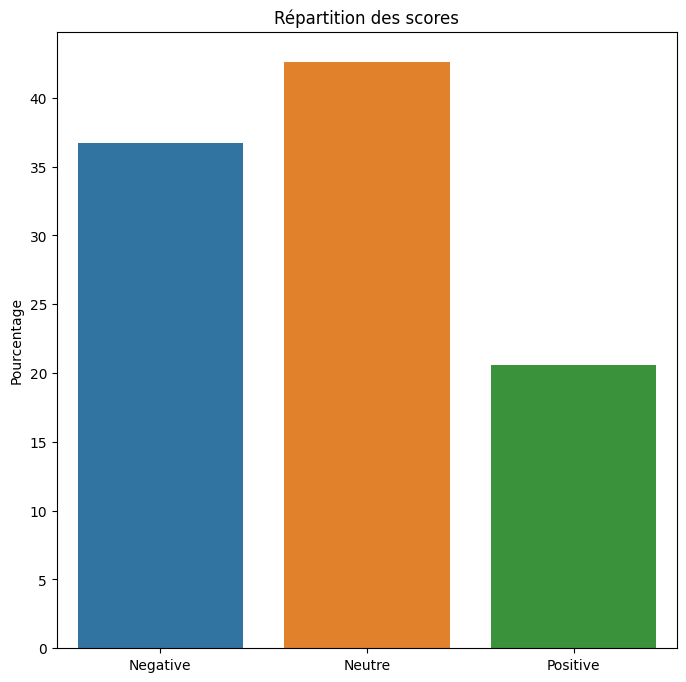

In [46]:
fig, ax = plt.subplots(figsize=(8, 8))
counts=df_score.Score.value_counts(normalize=True)*100
sns.barplot(x=counts.index,y=counts,ax=ax)
ax.set_xticklabels(['Negative','Neutre','Positive'])
ax.set_ylabel('Pourcentage')
ax.set_title('Répartition des scores')
plt.show()

In [47]:
dates=set()
for date in df['Temps de création']:
  dates.add(date)
print(dates)

{'2024-01-11', '2024-01-06', '2024-01-04', '2024-01-10', '2024-01-07', '2024-01-09', '2023-12-10', '2024-01-02', '2024-01-05', '2024-01-08', '2024-01-03', '2023-12-31', '2024-01-01', '2023-12-30'}


In [50]:
df['Temps de création'].value_counts()

2024-01-01    67
2024-01-07    65
2024-01-10    63
2024-01-03    62
2024-01-09    59
2024-01-05    54
2024-01-02    51
2024-01-06    50
2024-01-04    50
2024-01-08    47
2024-01-11    41
2023-12-31    34
2023-12-10     1
2023-12-30     1
Name: Temps de création, dtype: int64

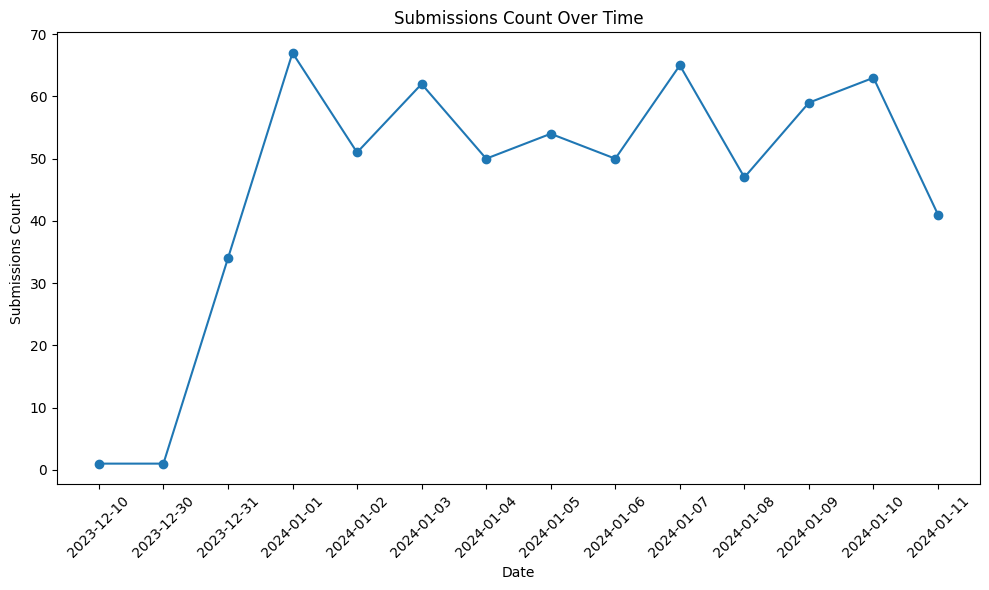

In [49]:
submission_counts = df['Temps de création'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(submission_counts.index, submission_counts.values, marker='o', linestyle='-')
plt.title('Submissions Count Over Time')
plt.xlabel('Date')
plt.ylabel('Submissions Count')
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()
